## 01-Baumgartner
A mintapéldák között láttunk Felix Baumgartner ugrásával kapcsolatban több példát is. Határozzuk meg $g$ és $\alpha$ értékét a $v(t)$ függvény elejéhez vett lineáris, illetve a $t=210\dots260$ intervallumban illesztett konstans függvényekből! Itt is készítsünk szépen formázott ábrát! A szükséges adatok a `../data/v_vs_t` file-ban találhatóak. A file első oszlopa az esés ideje s-ban, a második oszlop a sebesség km/h-ban.
Egy egyenletesen $g$-vel gyorsuló test sebessége az idő függvényében az egyszerű $$ v(t)=gt $$ kifejezés szerint változik.
Az $\alpha$ közegellenállási együttható pedig a $$ \alpha=\frac{mg}{v^2} $$ kifejezésből kapható meg, ahol a $v$ sebesség a $v(t)$ függvény $t=210\dots260$ időintervallumban vett konstans illesztéséből adódó érték.

In [2]:
%pylab inline
from scipy.optimize import curve_fit # Az illesztéshez használt függvény
from numpy.fft import *              # Fourier-analízishez használt rutinok
from scipy.signal import spectrogram # Spektrogramm készítő függvény

Populating the interactive namespace from numpy and matplotlib


In [3]:
baum_data=loadtxt('../data/v_vs_t.txt')

In [4]:
t=baum_data[:,0] # idő
v=baum_data[:,1]/3.6 # sebesség

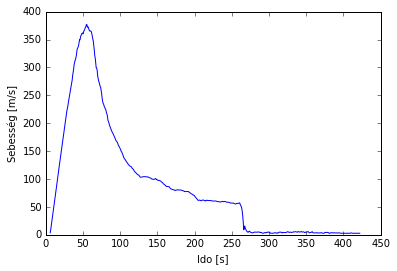

In [5]:
plot(t,v)
xlabel('Ido [s]')
ylabel('Sebesség [m/s]')

In [6]:
def linearis(x,a,b):
    'Linearis fuggveny: a*x+b'
    return a*x+b

def konstans(x,a):
    'Konstans függvény: a*x '
    return 0*x+a

In [7]:
p_eleje,pcov =curve_fit(linearis,t[t<50],v[t<50]) 
err_eleje = sqrt(diag(pcov))
# az illesztett parameterek ertekei es a hibak
print('a=',p_eleje[0],'±',err_eleje[0]) 
print('b=',p_eleje[1],'±',err_eleje[1])

a= 8.57784577082 ± 0.102549589524
b= -32.9906813469 ± 3.15263060302


In [8]:
p_vege,pcov =curve_fit(konstans,t[(t>210)*(t<260)],v[(t>210)*(t<260)]) # illesztes azon pontokra ahol az ido kissebb mint 40
err_vege = sqrt(diag(pcov))
# az illesztett parameterek ertekei es a hibak
print('a=',p_vege[0],'±',err_vege[0]) 

a= 59.2407407409 ± 0.22908165415


In [9]:
v2=p_vege[0]
m=110
g=p_eleje[0]
alpha= m*g/v2**2
alpha

0.26886233002808912

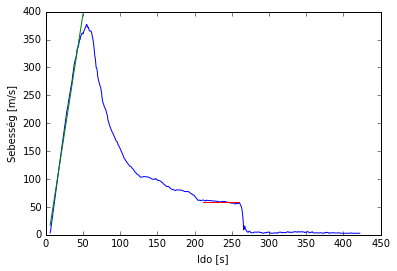

In [15]:
plot(t,v)
plot(t[t<50], linearis(t[t<50], *p_eleje))
plot(t[(t>210)*(t<260)], konstans(t[(t>210)*(t<260)], *p_vege))
xlabel('Ido [s]')
ylabel('Sebesség [m/s]')